# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1145,spam,"Thank you, winner notified by sms. Good Luck! ...",NaN,NaN,NaN
3199,ham,Just curious because my cuz asked what I was u...,NaN,NaN,NaN
3450,ham,Yes we were outside for like 2 hours. And I ca...,NaN,NaN,NaN
1664,ham,ÌÏ v ma fan...,NaN,NaN,NaN
3962,ham,If you ask her or she say any please message.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4468,ham,"Nothing, smsing u n xy lor. Sorry lor da guys ..."
2044,ham,I can send you a pic if you like :)
1533,ham,Horrible bf... I now v hungry...
2841,ham,aathi..where are you dear..
4170,ham,Pls what's the full name of joke's school cos ...


In [8]:
#renaming columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3564,ham,We know TAJ MAHAL as symbol of love. But the o...
219,ham,Yeah you should. I think you can use your gt a...
2975,ham,I love u 2 my little pocy bell I am sorry but ...
1823,ham,Same as u... Dun wan... Y u dun like me alread...
3741,ham,Hey i'm bored... So i'm thinking of u... So wa...


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#duplicate value
df.duplicated().sum()

403

In [14]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

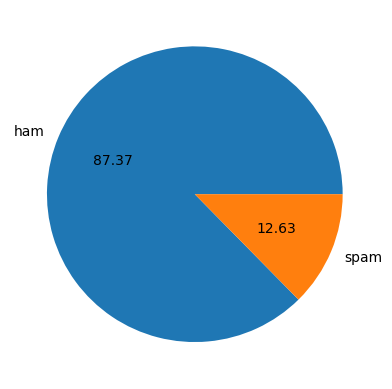

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [20]:
df['num_characters']=df['text'].apply(len)

In [21]:
df.sample(5)

,target,text,num_characters
4899,1,"ou are guaranteed the latest Nokia Phone, a 40...",146
699,0,K..u also dont msg or reply to his msg..,40
582,1,We tried to contact you re your reply to our o...,149
2809,0,Mm so you asked me not to call radio,36
2852,0,I doubt you could handle 5 times per night in ...,57


In [23]:
#num of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.sample(5)

,target,text,num_characters,num_words
651,0,I'm gonna say no. Sorry. I would but as normal...,119,30
3164,0,Cheers for the card ... Is it that time of yea...,56,13
707,0,Quite late lar... Ard 12 anyway i wun b drivin...,49,12
624,0,"Nah it's straight, if you can just bring bud o...",123,25
435,0,The message sent is askin for &lt;#&gt; dolla...,89,34


In [25]:
#num of sentence

df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
2248,0,will you like to be spoiled? :),31,9,2
296,0,Unless it's a situation where YOU GO GURL woul...,67,13,1
494,0,Are you free now?can i call now?,32,10,1
1946,0,Hey we can go jazz power yoga hip hop kb and y...,54,12,1
3236,0,Ron say fri leh. N he said ding tai feng cant ...,86,21,3


In [34]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe() #ham msg

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe() #spam msg

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

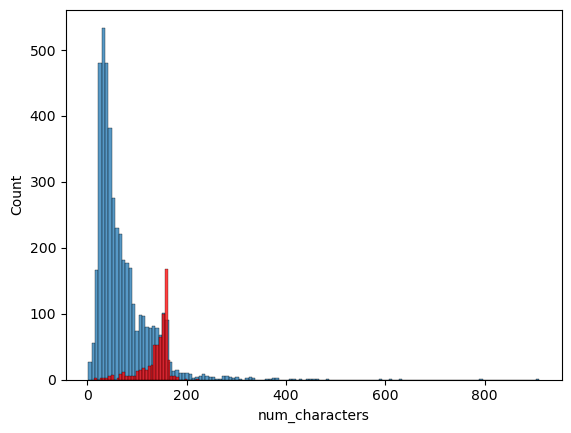

In [40]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

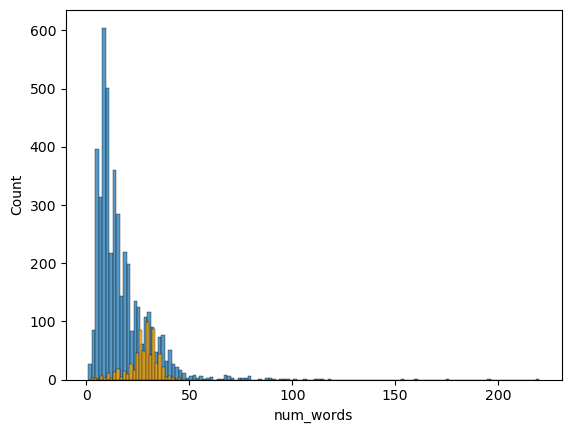

In [44]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='orange')

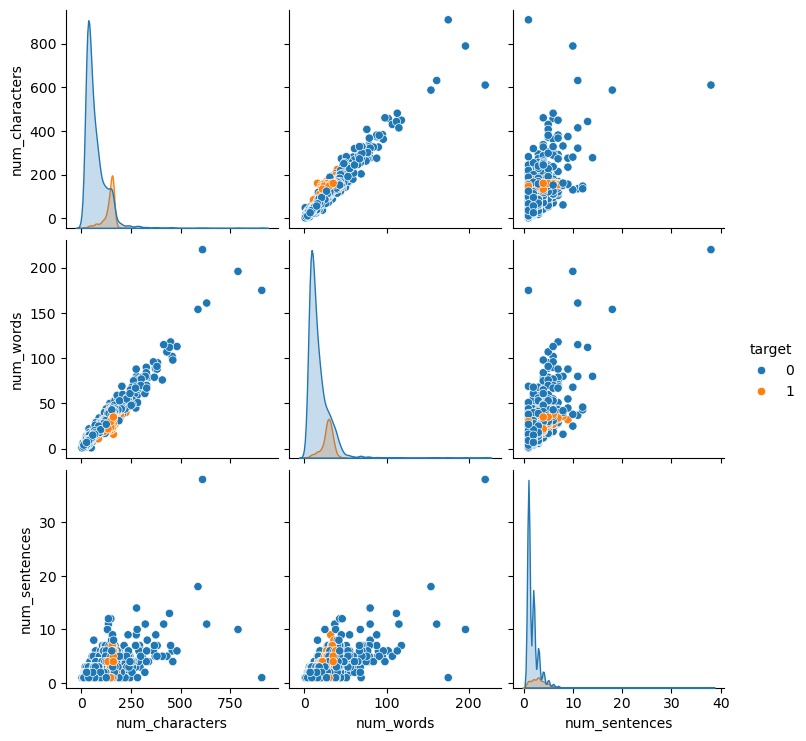

In [45]:
sns.pairplot(df,hue='target')

## Data Preprocessing

In [38]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [39]:
def transform_text(text):
    #lower case 
    text=text.lower()
    #tokenizing words
    text=nltk.word_tokenize(text)
    
    #removing special characters
    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    #removing stopwords and punctuation

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    #stemming

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [43]:
df['transformed_text']=df['text'].apply(transform_text)

In [44]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
1030,0,Can not use foreign stamps in this country. Go...,58,12,2,use foreign stamp countri good lectur
4830,0,Po de :-):):-):-):-). No need job aha.,38,22,2,po de need job aha
1770,0,Dont show yourself. How far. Put new pictures ...,61,14,3,dont show far put new pictur facebook
2127,0,Tessy..pls do me a favor. Pls convey my birthd...,113,26,3,tessi pl favor pl convey birthday wish nimya p...
3245,0,"Funny fact Nobody teaches volcanoes 2 erupt, t...",151,28,1,funni fact nobodi teach volcano 2 erupt tsunam...
1750,0,Got it..mail panren paru..,26,7,1,got mail panren paru
2050,0,Hi where you. You in home or calicut?,37,10,2,hi home calicut
5059,0,I think i am disturbing her da,30,7,1,think disturb da
261,0,Anyway i'm going shopping on my own now. Cos m...,85,22,3,anyway go shop co si done yet dun disturb u liao
1228,1,FREE entry into our å£250 weekly comp just sen...,123,25,2,free entri weekli comp send word enter 84128 1...
